# Kelompok 2

# Modul 1: Decomposition and Smoothing Time-Series Data Analysis

I. Tujuan Praktikum
1. Melakukan harmonic analysis untuk melihat sinyal-sinyal kuat atau yang berpengaruh paling besar terhadap data.
2. Melakukan moving average untuk mengestimasi efek musiman yang digunaan untuk membuat dan menyajikan nilai musiman yang disesuaikan.

II. Kajian Pustaka

1) Harmonic Analysis

Harmonic Analysis merupakan sebuah metode statistik untuk menentukan amplitudo dan periode komponen harmonik atau gelombang tertentu dalam satu set data dengan bantuan deret Fourier. Harmonic analysis menggambarkan fungsi periodik sebagai jumlah dari fungsi sinus dan cosinus.
Dalam meteorologi, harmonic analysis misalnya digunakan untuk menentukan periodisitas dalam data iklim (Conrad 1950), untuk menentukan panjang gelombang paling kuat yang terwakili dalam pola aliran sirkulasi umum, dan untuk menentukan spektrum turbulensi Eddies(Sutton 1953). 
    
2) Moving Average

Moving Averages adalah metode peramalan perataan nilai dengan mengambil sekelompok nilai dari pengamatan yang kemudian dicari rata-ratanya, lalu nilai rata-rata tersebut digunakan sebagai ramalan untuk periode berikutnya. Istilah moving average digunakan karena setiap kali data observasi baru tersedia, maka angka rata-rata yang baru dihitung dan dipergunakan sebagi ramalan. 
Terdapat beberapa tipe moving average dan masing-masing mempunyai level pembacaan pergerakan data yang berbeda, namun memiliki karakteristik yang sama, yaitu dengan memuluskan pergerakan data. Secara umum, semakin mulus moving average maka semakin lamban ia bereaksi terhadap pergerakan data. Sebaliknya, semakin fluktuatif, maka semakin cepat moving average bereaksi terhadap pergerakan data. Untuk membuat moving average lebih mulus, dibutuhkan rata-rata penutupan data atas periode waktu yang lebih panjang.

3) Fenomena di Daerah Kajian

a. Angin monsun

Angin monsun adalah angin yang berhembus dan berganti  arah dua kali atau polanya berlawanan sepanjang tahun. Ada dua macam monsun yang ada di Indonesia yaitu monsun barat dan monsun timur.
Angin monsun barat bergerak saat matahari berada di belahan bumi selatan yang mengakibatkan Benua Australia mengalami musim panas sehingga bertekanan rendah, sedangkan suhu di Benua Asia lebih dingin dan bertekanan tinggi sehingga angin bergerak dari Benua Asia menuju Benua Australia. Angin monsun barat mengakibatkan wilayah Indonesia akan mengalami musim hujan akibat adanya massa uap air yang dibawa oleh angin ini, saat melalui Samudera Pasifik dan Laut China Selatan.
Angin monsun timur bertiup saat matahari berada di belahan bumi bagian utara sehingga menyebabkan suhu di Benua Australia lebih dingin dan bertekanan tinggi, sedangkan di Benua Asia suhunya lebih panas dan bertekanan rendah sehingga angin cenderung bertiup dari Benua Australia menuju Benua Asia. Pada waktu itu Indonesia akan mengalami musim kemarau akibat angin tersebut melalui gurun pasir di bagian utara Australia yang kering dan hanya melalui lautan yang sempit.

b. Pola Diurnal

Selain faktor tahunan dari monsoon, wilayah Indonesia yang merupakan wilayah tropis juga dipengaruhi oleh faktor-faktor non tahunan seperti pola harian atau pola diurnal. Wilayah Indonesia memiliki pola diurnal yang kuat karena tidak adanya perbedaan suhu permukaan dan tekanan yang besar antara selang waktu yang berbeda, sehingga terjadi sirkulasi angin permukaan yang lemah. Akibat lemahnya sirkulasi angin permukaan, pengaruh angin lokal seperti angin darat dan laut, angin lembah, angin gunung, dan angin danau menjadi kuat. Angin-angin tersebut ditambah dengan faktor besarnya perbedaan radiasi matahari menyebabkan faktor harian diurnal menjadi dominan. Faktor diurnal merupakan perbedaan antara siang dan malam akibat kondisi lokal tersebut.


III. Data dan Metode

Data yang kami gunakan adalah data Stasiun Denpasar, Ngurah Rai selama 5 tahun yaitu tahun 2012, 2013, 2014, 2015, dan 2016. Data yang diambil adalah data temperatur dan tekanan. 

Langkah pengerjaan yang dilakukan adalah:

1. Menggabungkan data ogimet Stasiun Denpasar selama 5 tahun yang telah digunakan pada modul 0.
2. Buka file excel yang berisi data stasiun yang telah dirapihkan melalui Jupyter notebook.
3. Membuat bentuk data T dan P dalam bentuk array.
4. Melakukan analisis harmonik dengan mencari nilai A dan B dari temperatur dan tekanan untuk memperoleh C (amplitudo) masing-masing serta mencari nilai k (bilangan gelombang).
5. Memplot periodogram periode terhadap C dan k (bilangan gelombang) terhadap C untuk temperatur dan tekanan. Dari hasil plot periodogram dilihat di k mana dan periode mana sinyal-sinyal kuat berada.
6. Hasil dari periode yang diperoleh dari analisis harmonik digunakan untuk moving average data temperatur dan tekanan untuk melihat nilai musiman. 


IV. Analisis dan Pembahasan

In [1]:
import xlrd 
from math import *
from numpy import *
from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
wb = xlrd.open_workbook('D:/data gabungan.xlsx') #Buka data
sheet_data = wb.sheet_by_index(0) #Baca data dari nol
T = array(sheet_data.col_values(2,1)) #Baca data kolom ke 3 dari baris ke 2
P = array(sheet_data.col_values(5,1))  #Baca data kolom ke 6  dar baris ke 2         

In [3]:
#Dekomposisi dengan Harmonic Analysis
t=np.linspace(1, 14616, 14616)
Nt=len(T)
Np=len(P)
#melakukan Analisis Harmonik menggunakan data temp dan tekanan

#mendefinisikan matriks kosong A dan B untuk mencari nilai C dan theta
At=np.empty([int(Nt/2)])
Bt=np.empty([int(Nt/2)])
Ap=np.empty([int(Nt/2)])
Bp=np.empty([int(Nt/2)])

#menghitung nilai A dan B untuk setiap bilangan gelombang dengan pendekatan sinus kosinus
#dengan menjumlahkan tiap waktunya
#untuk temperatur
for kt in range(1,int(np.fix(Nt/2))+1):
    x2t = T*np.sin(2*np.pi*kt*t/Nt)
    Bt[kt-1]=(2/Nt)*sum(x2t);
    
for kt in range(1,int(np.fix(Nt/2))+1):
    x1t = T*np.cos(2*np.pi*kt*t/Nt)
    At[kt-1]=(2/Nt)*sum(x1t);
    
#untuk tekanan
for kp in range(1,int(np.fix(Np/2))+1):
    x2p = P*np.sin(2*np.pi*kp*t/Np)
    Bp[kp-1]=(2/Np)*sum(x2p);
    
for kp in range(1,int(np.fix(Np/2))+1):
    x1p = P*np.cos(2*np.pi*kp*t/Np)
    Ap[kp-1]=(2/Np)*sum(x1p);
    
#menghitung C dan theta
#untuk temperatur
Ct=sqrt((At**2)+(Bt**2))
thetat=T[0:int(Nt/2)]*nan
thetat[At>0.0]=np.arctan(Bt[At>0.0]/At[At>0.0])
thetat[At<0.0]=np.arctan(Bt[At<0.0]/At[At<0.0])+np.pi
thetat[At==0.0]=np.pi/2

#untuk tekanan
Cp=sqrt((Ap**2)+(Bp**2))
thetap=P[0:int(Nt/2)]*nan
thetap[Ap>0.0]=np.arctan(Bp[Ap>0.0]/Ap[Ap>0.0])
thetap[Ap<0.0]=np.arctan(Bp[Ap<0.0]/Ap[Ap<0.0])+np.pi
thetap[Ap==0.0]=np.pi/2


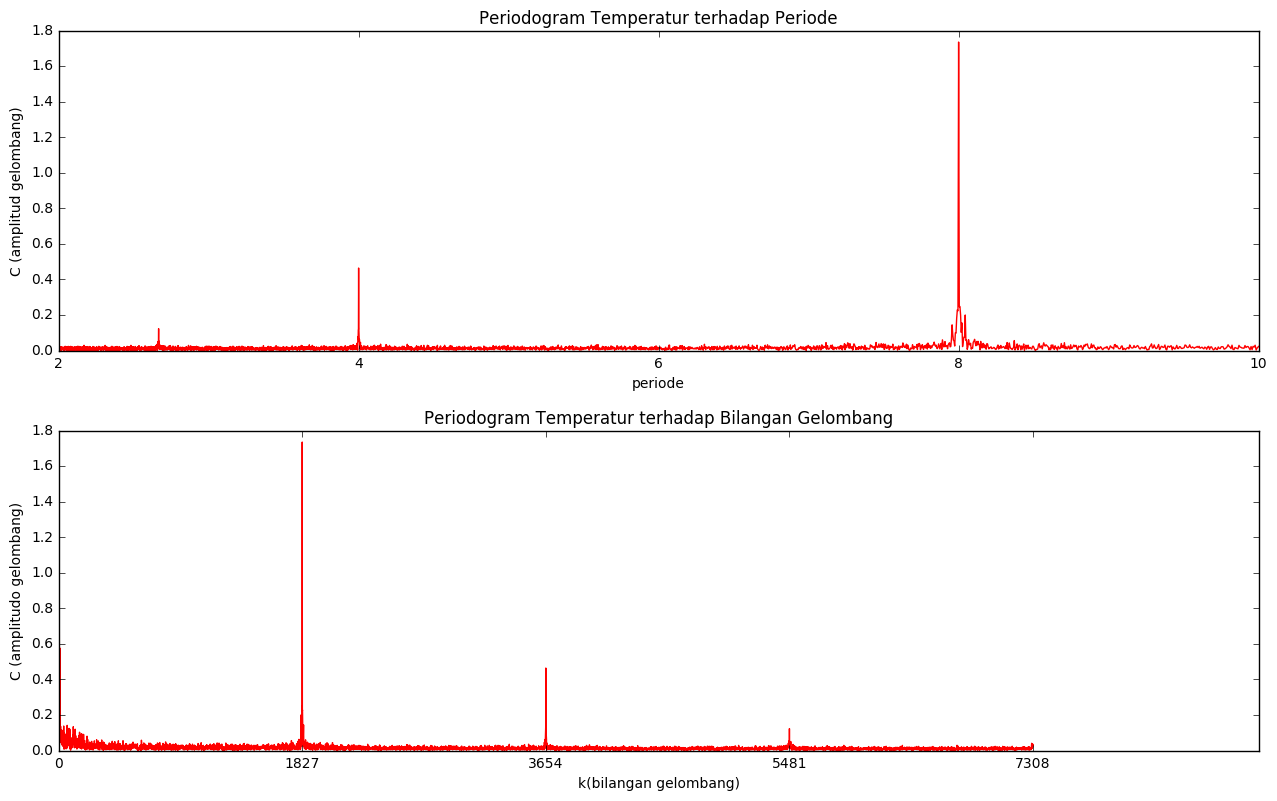

In [14]:
#plot periodogram temperatur
kt=np.linspace(1,Nt/2,Nt/2)
periodet=Nt/kt
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 2, 0.8]) 
ax2 = fig1.add_axes([0, 1, 2, 0.8]) 
#ax3 = fig1.add_axes([1.4,1.3,0.5,0.3])



ax2.plot(periodet,Ct, 'r')
ax2.set_xlabel('periode')
ax2.set_ylabel('C (amplitud gelombang)')
ax2.set_title('Periodogram Temperatur terhadap Periode')
ax2.set_xticks([2, 4, 6,8,10])
ax2.set_xlim([2, 10])

ax.plot(kt,Ct, 'r')
ax.set_xlabel('k(bilangan gelombang)')
ax.set_ylabel('C (amplitudo gelombang)')
ax.set_title('Periodogram Temperatur terhadap Bilangan Gelombang')
ax.set_xticks([0, 1827, 3654, 5481, 7308, 9135, 10962, 12789, 14616])
ax.set_xlim([0, 9000])

fig1

In [5]:
#Dekomposisi masing-masing sinyal sesuai dengan periode yang telah didefinisikan, plot gambar
find(Ct>0.5) #mencari nilai data ke berapa dimana sinyal kuat

array([   4,    9, 1826], dtype=int64)

In [6]:
#mendefinisikan fungsi menggunkan formula moving average

def movaverage(T, NF):  #fungsi moving average data 'x' , periode 'NF'
    Nt = len(T)
    NF = 2*round(NF/2)
    Bt = np.ones(Nt-NF)
    
    for n in range(int(NF/2)+1,(Nt-int(NF/2))+1):
        Bt[(n-int(NF/2))-1] = np.nanmean(T[(n-int(NF/2))-1:(n+int(NF/2))-1])  #moving average dengan periode NF
    
    At = NaN*T
    At[(int(NF/2)+1)-1:(Nt-int(NF/2))] = Bt
    return At

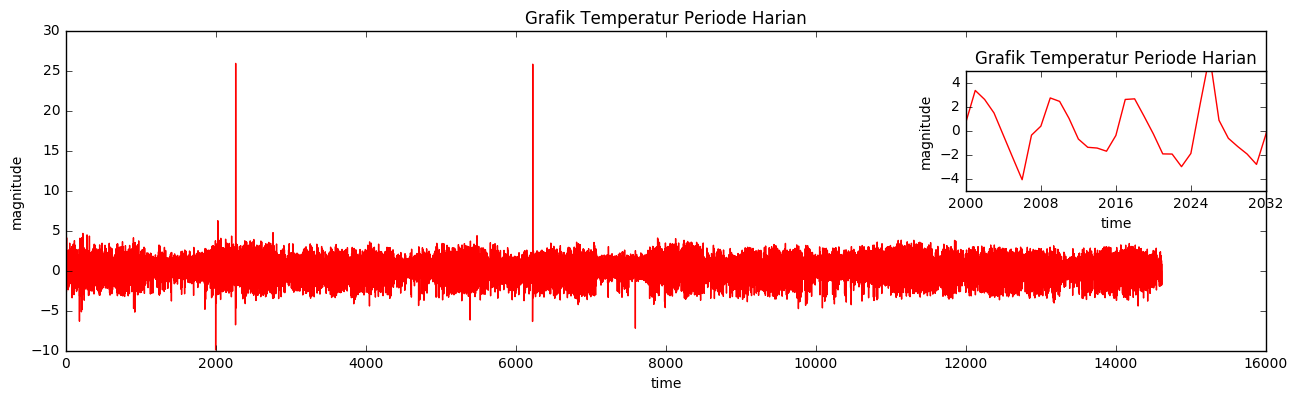

In [7]:
#memanggil fungsi untuk dekomp
Tp8 = T - (movaverage(T,8))

#visualisasi dan uji coba kesesuaian
fig3 = plt.figure()
axT = fig3.add_axes([0, 0, 2, 0.8]) 
ax2 = fig3.add_axes([1.5, 0.4, 0.5, 0.3]) 

axT.plot(Tp8, 'r')
axT.set_xlabel('time')
axT.set_ylabel('magnitude')
axT.set_title('Grafik Temperatur Periode Harian')

ax2.plot(Tp8, 'r')
ax2.set_xlabel('time')
ax2.set_ylabel('magnitude')
ax2.set_xticks([2000, 2008, 2016, 2024, 2032 ])
ax2.set_xlim([2000, 2032])
ax2.set_ylim([-5, 5])
ax2.set_title('Grafik Temperatur Periode Harian')


fig3


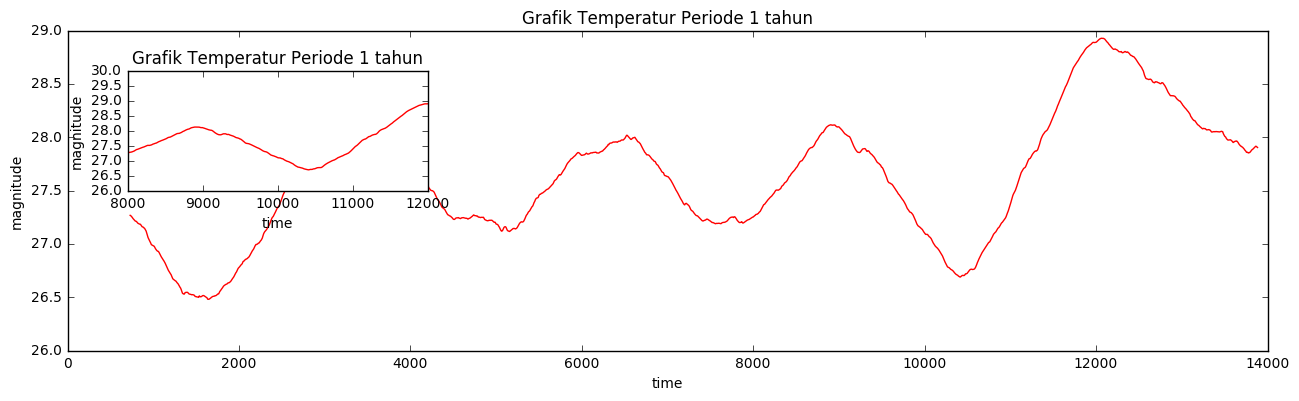

In [8]:
#Untuk nilai k=5, periode= 2923.2 = 365.4 hari/1 tahun
#memanggil fungsi untuk dekomp
T8 =(movaverage(T,8))
Tp1 =(movaverage(T8,1462))


#visualisasi dan uji coba kesesuaian periode 365.4 hari
fig5 = plt.figure()
axT = fig5.add_axes([0, 0, 2, 0.8]) 
ax2 = fig5.add_axes([0.1, 0.4, 0.5, 0.3]) 

axT.plot(Tp1, 'r')
axT.set_xlabel('time')
axT.set_ylabel('magnitude')
axT.set_title('Grafik Temperatur Periode 1 tahun')

ax2.plot(Tp1, 'r')
ax2.set_xlabel('time')
ax2.set_ylabel('magnitude')
ax2.set_xticks([8000,9000,10000,11000,12000])
ax2.set_xlim([8000,12000])
ax2.set_ylim([26, 30])

ax2.set_title('Grafik Temperatur Periode 1 tahun')

fig5

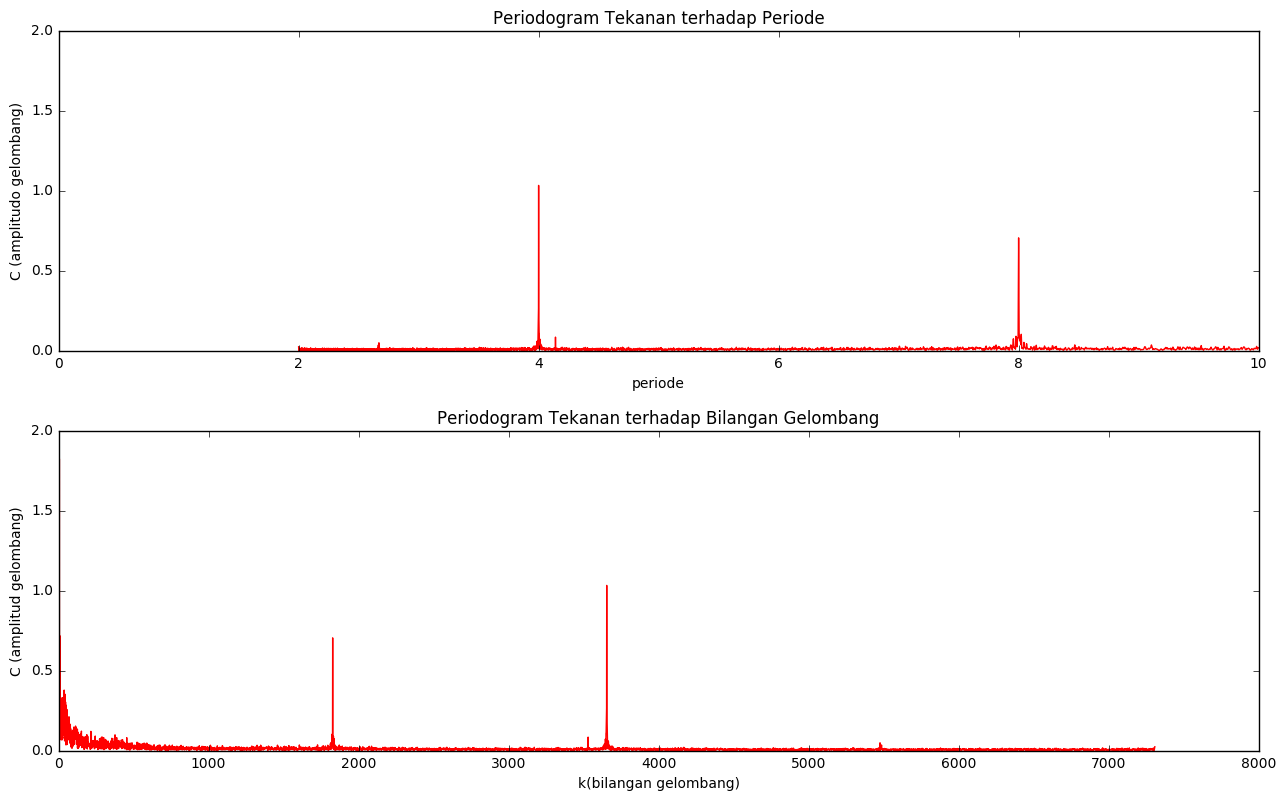

In [9]:
#plot periodogram tekanan
kp=np.linspace(1,7308,7308)
periodep=Np/kp
fig2 = plt.figure()
ax = fig2.add_axes([0, 0, 2, 0.8]) 
ax2 = fig2.add_axes([0, 1, 2, 0.8]) 

ax.plot(kp,Cp, 'r')
ax.set_xlabel('k(bilangan gelombang)')
ax.set_ylabel('C (amplitud gelombang)')
ax.set_title('Periodogram Tekanan terhadap Bilangan Gelombang')
#ax.set_xticks([1000, 2000, 3000,  4000, 5000, 6000, 7000])

ax2.plot(periodep,Cp, 'r')
ax2.set_xlabel('periode')
ax2.set_ylabel('C (amplitudo gelombang)')
ax2.set_title('Periodogram Tekanan terhadap Periode')
#ax2.set_xticks([0 ,2 ,4 ,6 ,8,10])
ax2.set_xlim([0, 10])

fig2

In [10]:
find(Cp>0.716) #mencari k dengan amplitudo terbesar

array([   0,    4,    9, 3653], dtype=int64)

In [11]:
np.amax(Cp)

1.8227123443872875

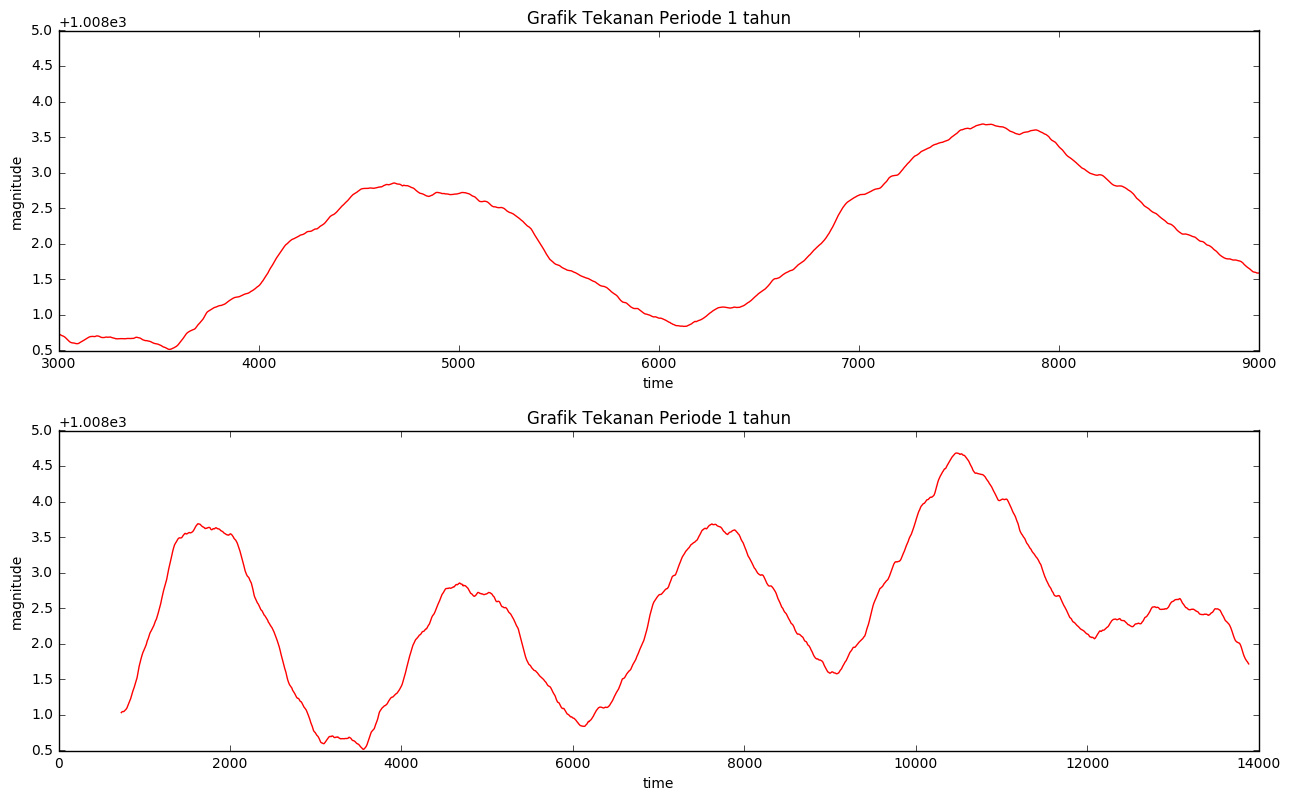

In [12]:
#Untuk nilai k=5, periode= 2923.2 = 365.4 hari/1 tahun
#memanggil fungsi untuk dekomp
Pt4 = (movaverage(P,4))
P1 = movaverage(Pt4,1462)

#visualisasi dan uji coba kesesuaian periode 365.4 hari
fig7 = plt.figure()
axP = fig7.add_axes([0.5, 0, 2, 0.8]) 
ax2 = fig7.add_axes([0.5, 1, 2, 0.8]) 

axP.plot(P1, 'r')
axP.set_xlabel('time')
axP.set_ylabel('magnitude')
axP.set_title('Grafik Tekanan Periode 1 tahun')

ax2.plot(P1, 'r')
ax2.set_xlabel('time')
ax2.set_ylabel('magnitude')
ax2.set_xticks([3000,4000,5000,6000,7000,8000,9000])
ax2.set_xlim([3000, 9000])

ax2.set_title('Grafik Tekanan Periode 1 tahun')

fig7

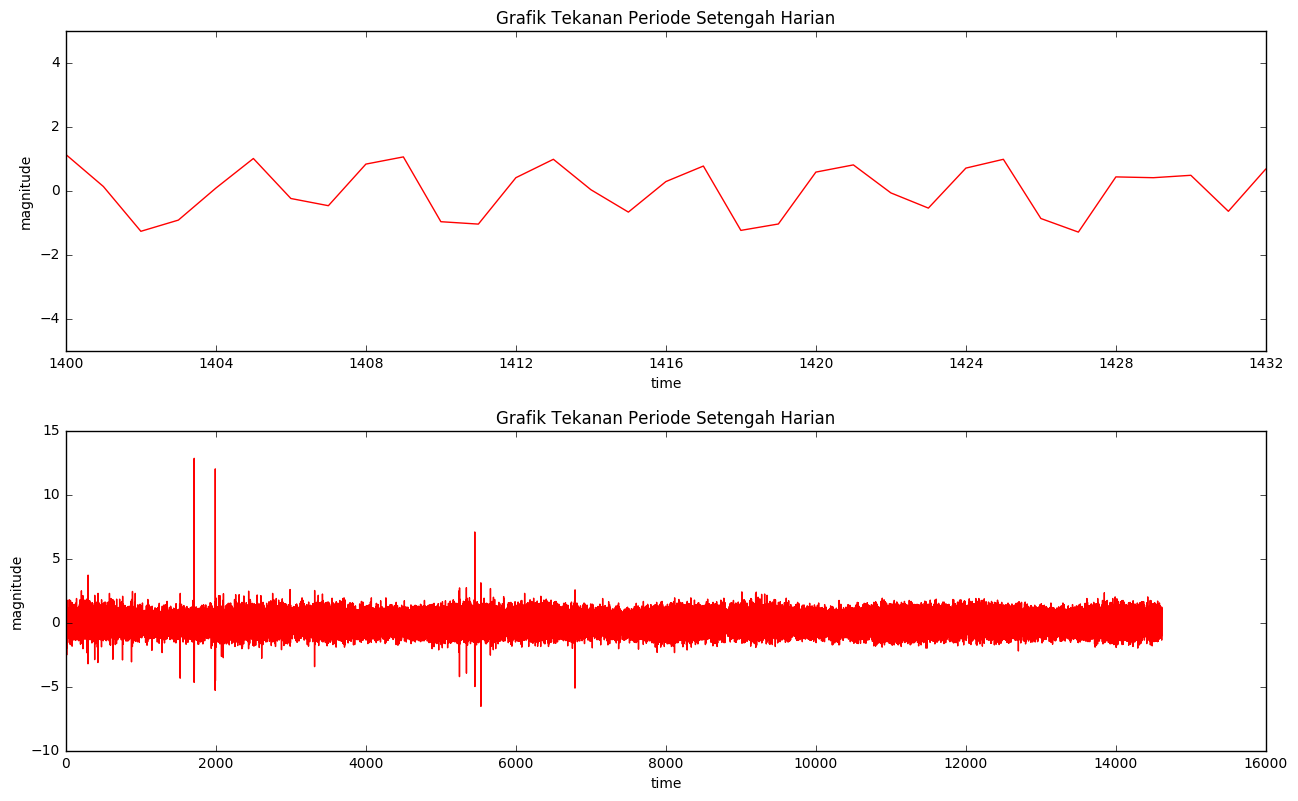

In [13]:
#Untuk nilai k=3654, periode= 4 = setengah harian
#memanggil fungsi untuk dekomp
P2 = P - (movaverage(P,4))

#visualisasi dan uji coba kesesuaian periode 365.4 hari
fig8 = plt.figure()
axP = fig8.add_axes([0.5, 0, 2, 0.8]) 
ax2 = fig8.add_axes([0.5, 1, 2, 0.8]) 

axP.plot(P2, 'r')
axP.set_xlabel('time')
axP.set_ylabel('magnitude')
axP.set_title('Grafik Tekanan Periode Setengah Harian')

ax2.plot(P2, 'r')
ax2.set_xlabel('time')
ax2.set_ylabel('magnitude')
ax2.set_xticks([1400,1404, 1408,1412,1416,1420,1424,1428, 1432])
ax2.set_xlim([1400, 1432])
ax2.set_ylim([-5, 5])
ax2.set_title('Grafik Tekanan Periode Setengah Harian')

fig8

V. Kesimpulan

VI. Daftar Pustaka
    
    Aldrian.Edvin.2008.Meteorologi Laut Indonesia. Jakarta.Badan Meteorologi dan Geofisika
    
    İdari Bilimler Dergisi.2012.Weather Derivatives and Pricing Approaches Hava (İKLİM). Atatürk Üniversitesi İktisadi
    
    http://www.seputarforex.com/belajar/sekolah/smp/kelas2/pengertian_dasar_moving_average.php
    
    http://informatika.web.id/moving-average.htm
    
    https://laluauliyaakraboe.wordpress.com/2010/01/02/pengaruh-monsun-terhadap-curah-hujan-dan-arus-angin-di-indonesia/
    
    http://glossary.ametsoc.org/wiki/Harmonic_analysis

